In [7]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [8]:
import os
os.chdir("C:\\Users\\MEDIA ENGINEER\\Desktop\\FE101\\Demo")

In [9]:
data = pd.read_csv('credit_demo.csv',na_values=['Missing','n/a','N/A','NA',""])

In [10]:
data.columns

Index(['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_HISTORY', 'BILL_AMT', 'PAY_AMT', 'default'],
      dtype='object')

In [11]:
data_train=data.sample(frac=0.80,random_state=200)
data_test=data.drop(data_train.index)

In [12]:
data_train.shape

(2393, 10)

In [13]:
data.default.value_counts()

0    2000
1     991
Name: default, dtype: int64

In [14]:
data_train.default.value_counts()

0    1597
1     796
Name: default, dtype: int64

In [15]:
data.default.value_counts()/data.shape[0]

0    0.668673
1    0.331327
Name: default, dtype: float64

In [16]:
data_train.default.value_counts()/data_train.shape[0]

0    0.667363
1    0.332637
Name: default, dtype: float64

In [17]:
data.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default
0,1,20000,MALE,3,2,35.0,-1,4486.500000,2354.833333,0
1,2,260000,FEMALE,1,2,51.0,-1,14728.166670,11051.333330,0
2,3,360000,FEMALE,1,1,49.0,-2,0.000000,0.000000,0
3,4,450000,FEMALE,1,1,40.0,-2,4494.166667,3764.833333,1
4,5,50000,FEMALE,3,1,47.0,-1,6701.333333,6594.500000,0


In [18]:
data.isnull().sum()

ID              0
LIMIT_BAL       0
GENDER          0
EDUCATION       0
MARRIAGE        0
AGE            21
PAY_HISTORY     0
BILL_AMT        0
PAY_AMT         0
default         0
dtype: int64

In [19]:
pd.options.display.float_format = '{:.0f}'.format
data_train.describe()

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default
count,2393,2393,2393,2393,2377,2393,2393,2393,2393
mean,1492,187564,2,1,37,-0,19431,5250,0
std,875,130059,1,1,9,2,40486,12145,0
min,1,10000,0,0,21,-2,-4466,0,0
25%,730,80000,1,1,29,-1,1352,833,0
50%,1498,170000,2,1,36,-1,4558,2067,0
75%,2255,260000,2,2,42,2,18412,5281,1
max,3000,800000,6,3,91,8,456958,385692,1


In [20]:
summary = data_train.describe()
summary.to_csv('summary.csv', sep=',')

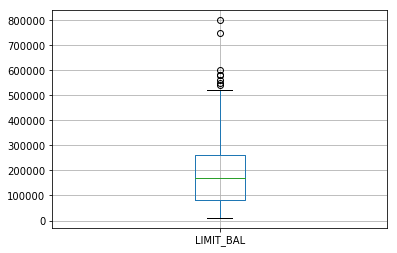

In [21]:
## Data Exploration
data_train.boxplot(column='LIMIT_BAL')
plt.show()


In [22]:
data_train['LIMIT_BAL'].quantile(0.99)

500000.0

In [23]:
data_train.loc[(data_train["LIMIT_BAL"]>500000)] 

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default
1412,1416,510000,FEMALE,1,1,48,-1,9446,8387,0
507,508,510000,MALE,1,1,41,-1,6923,6406,0
1297,1301,600000,FEMALE,3,1,46,-1,19336,17250,0
636,638,750000,FEMALE,3,1,40,-1,25000,35213,0
2979,2989,510000,FEMALE,1,2,40,3,456958,2333,1
239,240,540000,FEMALE,1,2,34,-1,1077,946,0
1518,1522,510000,FEMALE,1,1,37,-1,1212,1338,0
1031,1035,580000,MALE,1,2,31,-1,2986,2866,0
2246,2250,550000,MALE,1,2,31,-1,4582,2567,0
1275,1279,520000,MALE,1,2,39,-1,19802,18907,0


In [24]:
data_train.loc[(data_train["BILL_AMT"]<0)] 

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default
1107,1111,90000,FEMALE,2,1,36,-1,-124,722,0
2455,2459,500000,FEMALE,4,1,39,-1,-11,408,0
409,410,280000,MALE,1,1,44,-1,-2,1276,0
1914,1918,360000,MALE,2,2,37,-1,-235,917,0
290,291,80000,MALE,1,1,45,-1,-25,463,0
2074,2078,240000,MALE,1,1,36,-1,-8,374,0
2337,2341,290000,MALE,1,1,30,-1,-169,413,0
455,456,150000,FEMALE,1,2,42,-1,-41,833,0
43,44,200000,MALE,1,1,36,-1,-4466,28522,0
2334,2338,300000,MALE,2,2,27,-1,-66,83,0


In [25]:
data_train.loc[(data_train["BILL_AMT"]>20000)] 

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default
2157,2161,360000,MALE,2,1,37,-1,101140,17418,0
476,477,30000,MALE,3,1,45,4,28166,1383,1
713,715,190000,MALE,1,1,50,2,72968,2833,1
403,404,100000,FEMALE,3,1,36,2,57795,2883,1
2083,2087,500000,FEMALE,1,2,27,-1,26728,21481,0
1488,1492,30000,FEMALE,3,3,56,2,27735,1113,1
2526,2531,30000,MALE,2,2,39,4,26074,881,1
2950,2958,120000,MALE,1,1,44,2,77718,2533,1
1648,1652,130000,FEMALE,3,2,24,2,49642,1850,1
1438,1442,60000,FEMALE,2,2,48,2,60825,1517,1


In [26]:
data_train['PAY_AMT'].quantile(0.99)

49249.96666999986

In [27]:
data_train.loc[(data_train["PAY_AMT"]>50000)] 

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default
2117,2121,350000,MALE,1,1,62,-1,72310,72179,0
122,123,360000,MALE,6,1,66,-1,54753,75708,0
728,730,500000,FEMALE,1,1,33,-1,373702,385692,0
751,753,360000,MALE,3,1,53,-1,80748,75048,0
2254,2258,270000,MALE,1,1,39,-1,44687,52475,0
100,101,200000,FEMALE,2,1,58,-1,34143,64586,0
666,668,420000,FEMALE,1,2,33,-1,5694,68090,0
1025,1029,430000,MALE,1,1,40,-1,78971,80522,0
2717,2722,320000,FEMALE,1,2,44,-1,61916,78762,0
1235,1239,500000,FEMALE,2,2,43,-1,147987,119072,0


In [28]:
pd.options.display.float_format = '{:.2f}'.format
data_train.groupby(['default', 'GENDER'], as_index=False)['GENDER'].size()/data_train.shape[0]

default  GENDER
0        FEMALE   0.43
         MALE     0.23
1        FEMALE   0.19
         MALE     0.15
dtype: float64

In [29]:
pd.crosstab(data_train.default, data_train.GENDER, margins=True)

GENDER,FEMALE,MALE,All
default,,,
0,1039,558,1597
1,449,347,796
All,1488,905,2393


In [30]:
pd.crosstab(data_train.default, data_train.GENDER, margins=True)/data_train.shape[0]

GENDER,FEMALE,MALE,All
default,,,
0,0.43,0.23,0.67
1,0.19,0.15,0.33
All,0.62,0.38,1.00


In [31]:
pd.crosstab(data_train.default, data_train.EDUCATION, margins=True)/data_train.shape[0]

EDUCATION,0,1,2,3,4,5,6,All
default,,,,,,,,
0,0.00,0.35,0.23,0.08,0.00,0.00,0.00,0.67
1,0.00,0.09,0.18,0.06,0.00,0.00,0.00,0.33
All,0.00,0.44,0.41,0.14,0.00,0.00,0.00,1.00


In [32]:
pd.crosstab(data_train.default, data_train.MARRIAGE, margins=True)/data_train.shape[0]

MARRIAGE,0,1,2,3,All
default,,,,,
0,0.00,0.35,0.31,0.00,0.67
1,0.00,0.17,0.16,0.01,0.33
All,0.00,0.52,0.47,0.01,1.00


In [35]:
pd.crosstab(data_train.default, data_train.PAY_HISTORY, margins=True)

PAY_HISTORY,-2,-1,2,3,4,5,6,7,8,All
default,,,,,,,,,,
0,1,1589,0,0,0,1,0,6,0,1597
1,121,0,555,70,14,6,7,21,2,796
All,122,1589,555,70,14,7,7,27,2,2393
